In [81]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [82]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [83]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [84]:
# Create engine to hawaii.sqlite
from pathlib import Path
engine = create_engine(f"sqlite:///Resources/hawaii.sqlite")


In [85]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)


In [86]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [87]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [88]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [89]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

from datetime import date, timedelta
recent_db = dt.datetime.strptime(recent_date, '%Y-%m-%d')
last_year_db = recent_db - timedelta(days=365)
last_year_db


datetime.datetime(2016, 8, 23, 0, 0)

In [91]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year_db).order_by(Measurement.date).all()
precipitation_scores

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [92]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation = pd.DataFrame(precipitation_scores, columns=['date', 'precipitation'])
df_precipitation

,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [93]:
# Sort the dataframe by date
date_df_precipitation = df_precipitation.sort_values(by='date')
date_df_precipitation


,date,precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


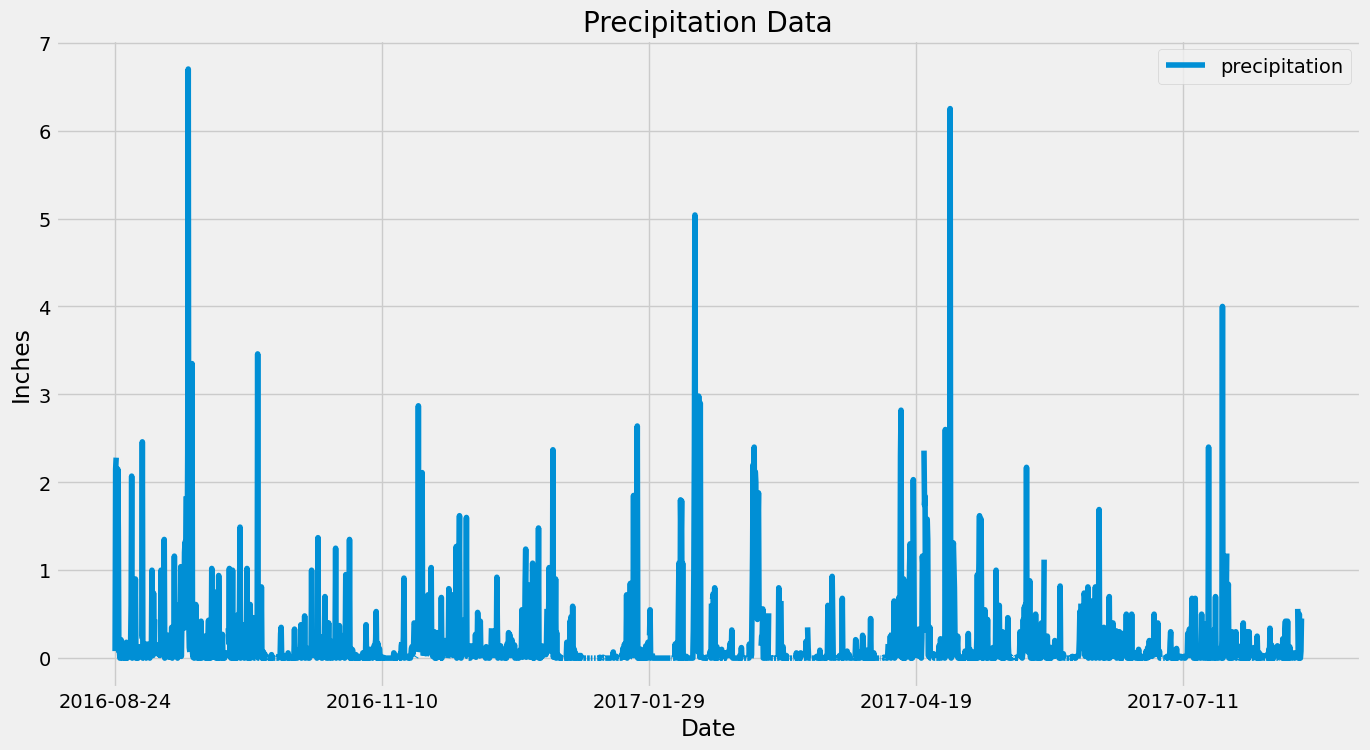

In [94]:
# Use Pandas Plotting with Matplotlib to plot the data
df_precipitation.plot(x='date', y='precipitation', kind='line', figsize=(15, 8))
plt.title('Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [95]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df_precipitation['precipitation'].describe()
summary_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
total_stations

9

In [97]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_id = active_stations[0].station

temps = session.query(func.min(Measurement.tobs).label('min_temp'),
                      func.max(Measurement.tobs).label('max_temp'),
                      func.avg(Measurement.tobs).label('avg_temp')).\
    filter(Measurement.station == active_station_id).\
    first()

print(f"Temperatura mínima: {temps.min_temp}")
print(f"Temperatura máxima: {temps.max_temp}")
print(f"Temperatura promedio: {temps.avg_temp}")

Temperatura mínima: 54.0
Temperatura máxima: 85.0
Temperatura promedio: 71.66378066378067


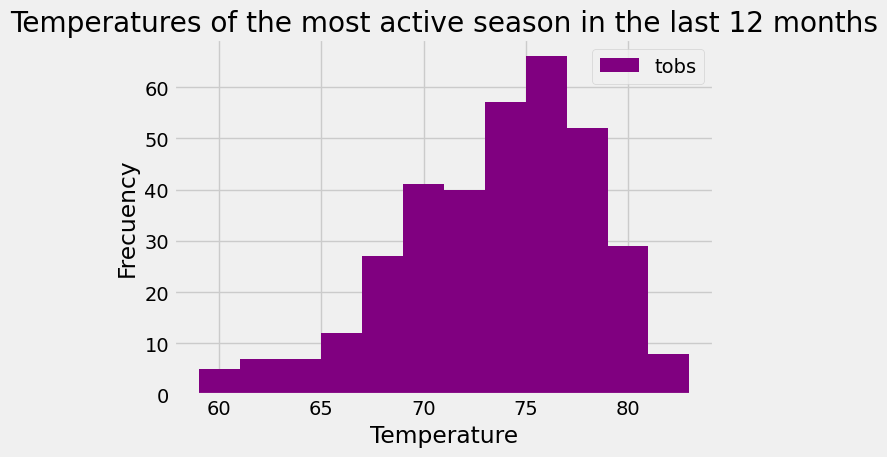

In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_obs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_station_id).\
                filter(Measurement.date >= last_year_db).all()

station_df = pd.DataFrame(station_temp_obs, columns=['date', 'temperature'])
station_df

plt.hist(station_df['temperature'], bins=12, color='purple', label='tobs')
plt.title("Temperatures of the most active season in the last 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frecuency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Close Session

In [100]:
# Close Session
session.close()